In [17]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
iris = load_iris()
print(iris.keys())
print(iris.target)
print(len(iris.target))
print(iris.target_names)
print(iris.feature_names)
print(iris.data)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
150
['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3

In [18]:
I = np.array([x for x in "abcdefghij"])
print(I)
J = np.random.permutation(len(I))
print(J)
print(I[J])

Jiris = np.random.permutation(150)
print(Jiris)

['a' 'b' 'c' 'd' 'e' 'f' 'g' 'h' 'i' 'j']
[3 8 7 2 6 9 0 1 5 4]
['d' 'i' 'h' 'c' 'g' 'j' 'a' 'b' 'f' 'e']
[ 69 129 148 130 132   2  81   8 140  33  54 123  30  58 146 147  71  70
 115  24  73  80 109 118   5  23  55 100  59 145  72  34  18 134  57  98
  83  29 128   9 116  43 105  95  66  78  14  21  49 141 121 138 112  91
  31  27 144  32  48  42 104  50 124  39  68  64  16 139  62   1  22 120
 133   3  61  56  17  35  41  90 102 149  75 137  84  92 136  88  37  20
  86  13  93 143 131  26 117  19  99  85 122  87  63   4  82 103  28 126
 135  79  76  46  65   6  10 108 101 114  44  53  15  40  36 142  25   0
  11 125 106 111 113  60  45   7  47  96  38  77  51  52 127  94  97 107
 119 110  74  67  89  12]


In [19]:
# Sort out the data into training/testing.

I = np.random.permutation(len(iris.target))
x_train = iris.data[I[:100]]
t_train = iris.target[I[:100]]

x_test = iris.data[I[100:]]
t_test = iris.target[I[100:]]

([<matplotlib.axis.YTick at 0x1c2ac06c7c0>,
 [Text(0, 0, 'setosa'), Text(0, 1, 'versicolor'), Text(0, 2, 'virginica')])

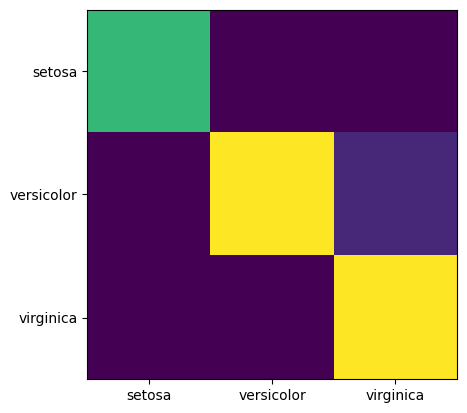

In [20]:
from sklearn.neural_network import MLPClassifier

# Instantiate the NN.
ann = MLPClassifier(max_iter=2000)

# Train the NN.
ann.fit(x_train, t_train)
y_test = ann.predict(x_test)

from sklearn.metrics import confusion_matrix

C = confusion_matrix(t_test, y_test)
plt.imshow(C)
plt.xticks(np.arange(3), iris.target_names)
plt.yticks(np.arange(3), iris.target_names)


# Multiple splits
Now do it many times.

In [21]:
from sklearn.metrics import accuracy_score

In [22]:
train_acc = []
test_acc = []

for i in range(30):
  # Pick a random split of the data.
  I = np.random.permutation(len(iris.target))
  x_train = iris.data[I[:100]]
  t_train = iris.target[I[:100]]

  x_test = iris.data[I[100:]]
  t_test = iris.target[I[100:]]

  # Train the ANN.
  ann = MLPClassifier()

  # Train the NN.
  ann.fit(x_train, t_train)
  y_train = ann.predict(x_train)
  y_test = ann.predict(x_test)

  train_acc.append(accuracy_score(t_train, y_train))
  test_acc.append(accuracy_score(t_test, y_test))

print(test_acc)



C:\Users\nathan.savage\PycharmProjects\uni 2005 set exercises\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\nathan.savage\PycharmProjects\uni 2005 set exercises\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\nathan.savage\PycharmProjects\uni 2005 set exercises\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\nathan.savage\PycharmProjects\uni 2005 set exercises\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimize

[0.9, 0.98, 0.98, 0.96, 0.98, 1.0, 0.98, 0.96, 0.96, 0.96, 1.0, 0.96, 0.98, 1.0, 0.96, 0.98, 0.98, 1.0, 0.96, 0.96, 0.98, 0.98, 0.96, 0.96, 1.0, 1.0, 0.98, 1.0, 1.0, 0.98]


C:\Users\nathan.savage\PycharmProjects\uni 2005 set exercises\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\nathan.savage\PycharmProjects\uni 2005 set exercises\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\nathan.savage\PycharmProjects\uni 2005 set exercises\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Text(0, 0.5, 'Accuracy (0-1, 1 is best)')

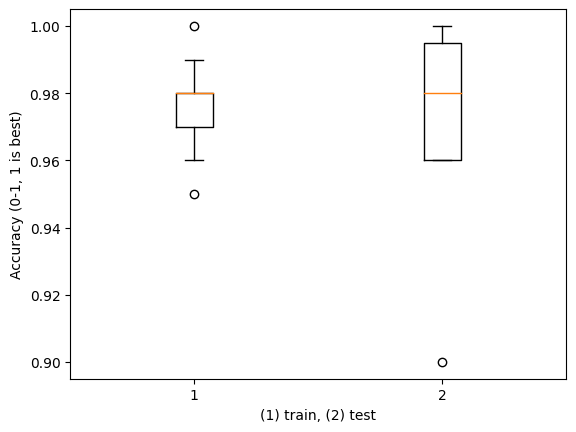

In [23]:
plt.boxplot([train_acc, test_acc])
plt.xlabel("(1) train, (2) test")
plt.ylabel("Accuracy (0-1, 1 is best)")

# Deep learning - now for something completely different.

In [24]:
import tensorflow as tf
from tensorflow.keras import layers

In [25]:
inputs = tf.keras.Input(shape=(784,))

In [26]:
dense = layers.Dense(64, activation="relu")
x = dense(inputs)

In [27]:
dense = layers.Dense(64, activation="relu")
outputs = layers.Dense(10)(x)

We've now defined our layers - now build the model.

In [28]:
model = tf.keras.Model(inputs=inputs, outputs=outputs, name="mnist_model")
model.summary()

Model: "mnist_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [29]:
(x_train, t_train), (x_test, t_test) = tf.keras.datasets.mnist.load_data()

x_train = x_train.reshape(60000, 784).astype("float") / 255
x_test = x_test.reshape(10000, 784).astype("float") / 255

11490434/11490434 [==============================] - 1s 0us/step


In [30]:
model.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer = tf.keras.optimizers.RMSprop(),
    metrics = ["accuracy"]
)

In [31]:
history = model.fit(x_train, t_train, batch_size=64, epochs=2, validation_split=0.2)

test_scores = model.evaluate(x_test, t_test, verbose=True)
print(f"Test accuracy: {test_scores}")

Epoch 1/2
750/750 [==============================] - 3s 3ms/step - loss: 0.3645 - accuracy: 0.9003 - val_loss: 0.2229 - val_accuracy: 0.9367
Epoch 2/2
313/313 [==============================] - 0s 1ms/step - loss: 0.1605 - accuracy: 0.9526
Test accuracy: [0.16050222516059875, 0.9526000022888184]


313/313 [==============================] - 0s 1ms/step


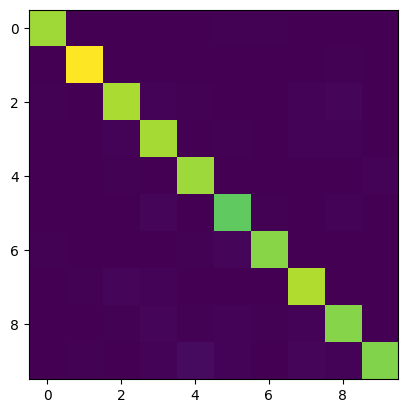

In [32]:
# Produce a confusion matrix for the DL model.
y_test = model.predict(x_test).argmax(axis=1)

C = confusion_matrix(t_test, y_test)
plt.imshow(C)